In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [23]:
data_path = 'E:\\leitianjian\\Dataset\\competition\\traffic1\\'

In [24]:
tti = pd.read_csv(data_path + 'train_TTI.csv')
tti['time'] = pd.to_datetime(tti['time'])
tti.head()

,id_road,TTI,speed,time
0,276183,1.03472,69.6197,2019-01-01 00:00:00
1,276183,1.03506,69.6275,2019-01-01 00:10:00
2,276183,1.04166,69.1003,2019-01-01 00:20:00
3,276183,1.02642,70.1266,2019-01-01 00:30:00
4,276183,1.01442,70.9565,2019-01-01 00:40:00


In [25]:
test_tti = pd.read_csv(data_path + 'toPredict_train_TTI.csv')
test_tti['time'] = pd.to_datetime(test_tti['time'])
test_tti.tail()

,id_road,TTI,speed,time
6043,276738,1.47263,27.9016,2020-01-01 20:10:00
6044,276738,1.47895,27.7825,2020-01-01 20:20:00
6045,276738,1.37184,29.9517,2020-01-01 20:30:00
6046,276738,1.41281,29.0830,2020-01-01 20:40:00
6047,276738,1.57808,26.0371,2020-01-01 20:50:00


In [26]:
test_timeline = pd.DataFrame({'time': pd.date_range('20191221 07:30:00', '20200101 21:30:00', freq='10min')})
test_timeline

,time
0,2019-12-21 07:30:00
1,2019-12-21 07:40:00
2,2019-12-21 07:50:00
3,2019-12-21 08:00:00
4,2019-12-21 08:10:00
5,2019-12-21 08:20:00
6,2019-12-21 08:30:00
7,2019-12-21 08:40:00
8,2019-12-21 08:50:00
9,2019-12-21 09:00:00


In [29]:
test_tti.groupby('id_road').apply(lambda x: print(x))

     id_road       TTI    speed                time
0     275911  1.054100  65.9403 2019-12-21 07:30:00
1     275911  1.061870  65.4578 2019-12-21 07:40:00
2     275911  1.049920  66.2031 2019-12-21 07:50:00
3     275911  1.047140  66.3787 2019-12-21 08:00:00
4     275911  1.081000  64.2997 2019-12-21 08:10:00
5     275911  1.096180  63.4092 2019-12-21 08:20:00
6     275911  1.133860  61.3020 2019-12-21 09:30:00
7     275911  1.192770  58.2745 2019-12-21 09:40:00
8     275911  1.235630  56.2528 2019-12-21 09:50:00
9     275911  1.299960  53.4693 2019-12-21 10:00:00
10    275911  1.365480  50.9036 2019-12-21 10:10:00
11    275911  1.465920  47.4158 2019-12-21 10:20:00
12    275911  1.598880  43.4728 2019-12-21 11:30:00
13    275911  1.564230  44.4357 2019-12-21 11:40:00
14    275911  1.487790  46.7189 2019-12-21 11:50:00
15    275911  1.381740  50.3044 2019-12-21 12:00:00
16    275911  1.302820  53.3516 2019-12-21 12:10:00
17    275911  1.205970  57.6364 2019-12-21 12:20:00
18    275911

      id_road      TTI    speed                time
4536   276269  1.09624  44.0264 2019-12-21 07:30:00
4537   276269  1.08529  44.4704 2019-12-21 07:40:00
4538   276269  1.10463  43.6877 2019-12-21 07:50:00
4539   276269  1.13530  42.5082 2019-12-21 08:00:00
4540   276269  1.14548  42.1339 2019-12-21 08:10:00
4541   276269  1.14039  42.3218 2019-12-21 08:20:00
4542   276269  1.23429  39.1023 2019-12-21 09:30:00
4543   276269  1.22821  39.2957 2019-12-21 09:40:00
4544   276269  1.17648  41.0234 2019-12-21 09:50:00
4545   276269  1.16958  41.2656 2019-12-21 10:00:00
4546   276269  1.22213  39.4911 2019-12-21 10:10:00
4547   276269  1.24839  38.6605 2019-12-21 10:20:00
4548   276269  1.19592  40.3568 2019-12-21 11:30:00
4549   276269  1.17036  41.2381 2019-12-21 11:40:00
4550   276269  1.14411  42.1844 2019-12-21 11:50:00
4551   276269  1.12720  42.8172 2019-12-21 12:00:00
4552   276269  1.16165  41.5472 2019-12-21 12:10:00
4553   276269  1.14446  42.1714 2019-12-21 12:20:00
4554   27626

""


In [54]:
test_tti_complete = test_tti.groupby('id_road').apply(lambda x: pd.merge(x, test_timeline, how='outer'))
test_tti_complete.drop('id_road', inplace=True, axis=1)
test_tti_complete.reset_index('id_road', inplace=True)
test_tti_complete.sort_values(['id_road', 'time'], inplace=True)
test_tti_complete.reset_index(inplace=True, drop=True)
test_tti_complete.head()

# test_tti_complete = test_tti

,id_road,TTI,speed,time
0,275911,1.05410,65.9403,2019-12-21 07:30:00
1,275911,1.06187,65.4578,2019-12-21 07:40:00
2,275911,1.04992,66.2031,2019-12-21 07:50:00
3,275911,1.04714,66.3787,2019-12-21 08:00:00
4,275911,1.08100,64.2997,2019-12-21 08:10:00


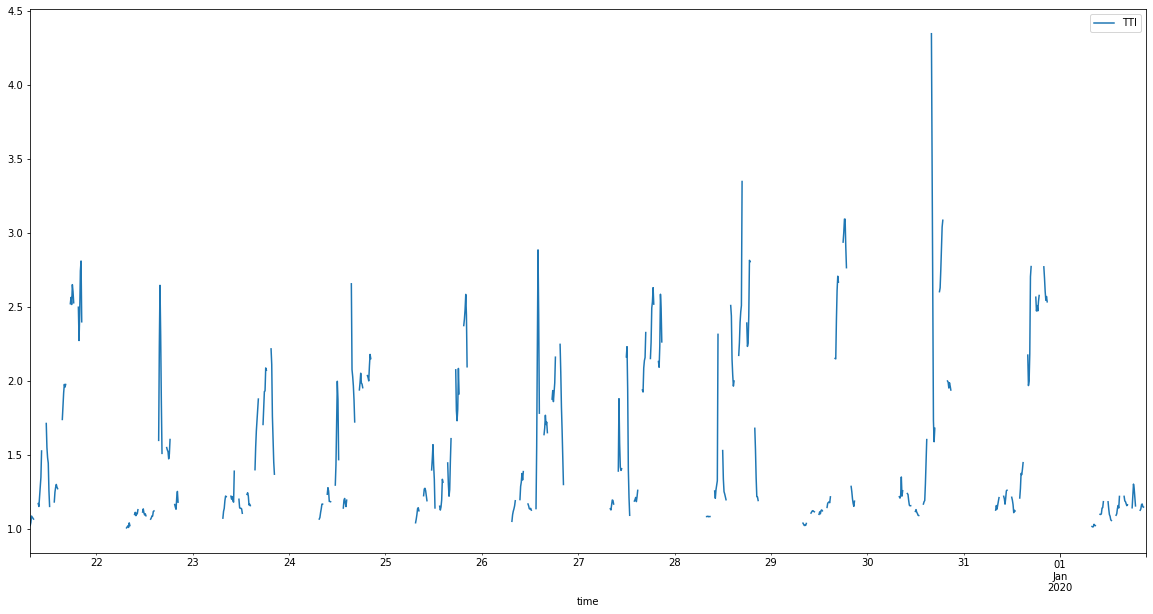

In [55]:
test_tti_complete[test_tti_complete['id_road']==276183].plot(x='time', y=['TTI'], figsize=(20, 10))

In [38]:
pred_tti = pd.read_csv(data_path + 'toPredict_noLabel.csv')
pred_tti['time'] = pd.to_datetime(pred_tti['time'])
pred_tti['year'] = pred_tti['time'].dt.year
pred_tti['month'] = pred_tti['time'].dt.month
pred_tti['day'] = pred_tti['time'].dt.day
pred_tti['hour'] = pred_tti['time'].dt.hour
pred_tti['minute'] = pred_tti['time'].dt.minute
pred_tti.head()

,id_sample,id_road,time,year,month,day,hour,minute
0,0,276183,2019-12-21 08:30:00,2019,12,21,8,30
1,1,276183,2019-12-21 08:40:00,2019,12,21,8,40
2,2,276183,2019-12-21 08:50:00,2019,12,21,8,50
3,3,276183,2019-12-21 10:30:00,2019,12,21,10,30
4,4,276183,2019-12-21 10:40:00,2019,12,21,10,40


In [39]:
tti['year'] = tti['time'].dt.year
tti['month'] = tti['time'].dt.month
tti['day'] = tti['time'].dt.day
tti['hour'] = tti['time'].dt.hour
tti['minute'] = tti['time'].dt.minute
tti.head()

,id_road,TTI,speed,time,year,month,day,hour,minute
0,276183,1.03472,69.6197,2019-01-01 00:00:00,2019,1,1,0,0
1,276183,1.03506,69.6275,2019-01-01 00:10:00,2019,1,1,0,10
2,276183,1.04166,69.1003,2019-01-01 00:20:00,2019,1,1,0,20
3,276183,1.02642,70.1266,2019-01-01 00:30:00,2019,1,1,0,30
4,276183,1.01442,70.9565,2019-01-01 00:40:00,2019,1,1,0,40


In [40]:
tti_copy = tti.copy()
tti_copy.drop(['speed', 'time'], axis=1, inplace=True)

In [41]:
tti_copy['day'] += 7

In [42]:
tti_copy = tti_copy[(tti_copy['month']==12)&(tti_copy['day']>=22)]
tti_copy.head()

,id_road,TTI,year,month,day,hour,minute
23739,276183,1.07643,2019,12,22,0,0
23740,276183,1.07165,2019,12,22,0,10
23741,276183,1.06181,2019,12,22,0,20
23742,276183,1.04844,2019,12,22,0,30
23743,276183,1.04762,2019,12,22,0,40


In [71]:
pred_tti_result = pd.merge(pred_tti, tti_copy, on=['id_road', 'year', 'month', 'day', 'hour', 'minute'], how='left')
pred_tti_result[pred_tti_result['id_road']==276183].dropna()

,id_sample,id_road,time,year,month,day,hour,minute,TTI
252,252,276183,2019-12-22 08:30:00,2019,12,22,8,30,1.03202
253,253,276183,2019-12-22 08:40:00,2019,12,22,8,40,1.04741
254,254,276183,2019-12-22 08:50:00,2019,12,22,8,50,1.04539
255,255,276183,2019-12-22 10:30:00,2019,12,22,10,30,1.14762
256,256,276183,2019-12-22 10:40:00,2019,12,22,10,40,1.14217
257,257,276183,2019-12-22 10:50:00,2019,12,22,10,50,1.11837
258,258,276183,2019-12-22 12:30:00,2019,12,22,12,30,1.10277
259,259,276183,2019-12-22 12:40:00,2019,12,22,12,40,1.12463
260,260,276183,2019-12-22 12:50:00,2019,12,22,12,50,1.14871
261,261,276183,2019-12-22 14:30:00,2019,12,22,14,30,1.25222


In [44]:
true_tti_21 = tti[(tti['year']==2019)&(tti['month']==12)&(tti['day']==21)].copy()
true_tti_21.drop(['time', 'speed'], inplace=True, axis=1)
true_tti_21.head()

,id_road,TTI,year,month,day,hour,minute
24603,276183,1.11521,2019,12,21,0,0
24604,276183,1.11497,2019,12,21,0,10
24605,276183,1.08324,2019,12,21,0,20
24606,276183,1.08833,2019,12,21,0,30
24607,276183,1.08778,2019,12,21,0,40


In [45]:
pred_tti_result = pd.merge(pred_tti_result, true_tti_21, on=['id_road', 'year', 'month', 'day', 'hour', 'minute'], how='left')
pred_tti_result[pred_tti_result['id_road']==276183].head()

,id_sample,id_road,time,year,month,day,hour,minute,TTI_x,TTI_y
0,0,276183,2019-12-21 08:30:00,2019,12,21,8,30,NaN,1.07890
1,1,276183,2019-12-21 08:40:00,2019,12,21,8,40,NaN,1.05762
2,2,276183,2019-12-21 08:50:00,2019,12,21,8,50,NaN,1.07482
3,3,276183,2019-12-21 10:30:00,2019,12,21,10,30,NaN,1.72275
4,4,276183,2019-12-21 10:40:00,2019,12,21,10,40,NaN,1.82338


In [46]:
true_tti_15_17 = tti[(tti['year']==2019)&(tti['month']==12)&(tti['day'].isin([15, 16, 17]))].copy()
true_tti_15_17.drop(['time', 'speed'], inplace=True, axis=1)
true_tti_15_17['day']+=14
true_tti_15_17.tail()

,id_road,TTI,year,month,day,hour,minute
295635,276738,1.36848,2019,12,31,23,10
295636,276738,1.26464,2019,12,31,23,20
295637,276738,1.25062,2019,12,31,23,30
295638,276738,1.32827,2019,12,31,23,40
295639,276738,1.24253,2019,12,31,23,50


In [47]:
pred_tti_result = pd.merge(pred_tti_result, true_tti_15_17, on=['id_road', 'year', 'month', 'day', 'hour', 'minute'], how='left')
pred_tti_result[pred_tti_result['id_road']==276183].head()

,id_sample,id_road,time,year,month,day,hour,minute,TTI_x,TTI_y,TTI
0,0,276183,2019-12-21 08:30:00,2019,12,21,8,30,NaN,1.07890,NaN
1,1,276183,2019-12-21 08:40:00,2019,12,21,8,40,NaN,1.05762,NaN
2,2,276183,2019-12-21 08:50:00,2019,12,21,8,50,NaN,1.07482,NaN
3,3,276183,2019-12-21 10:30:00,2019,12,21,10,30,NaN,1.72275,NaN
4,4,276183,2019-12-21 10:40:00,2019,12,21,10,40,NaN,1.82338,NaN


In [48]:
true_tti_1 = tti[(tti['year']==2019)&(tti['month']==1)&(tti['day']==1)].copy()
true_tti_1.drop(['time', 'speed'], inplace=True, axis=1)
true_tti_1['year'] = 2020
true_tti_1.head()

,id_road,TTI,year,month,day,hour,minute
0,276183,1.03472,2020,1,1,0,0
1,276183,1.03506,2020,1,1,0,10
2,276183,1.04166,2020,1,1,0,20
3,276183,1.02642,2020,1,1,0,30
4,276183,1.01442,2020,1,1,0,40


In [49]:
pred_tti_result = pd.merge(pred_tti_result, true_tti_1, on=['id_road', 'year', 'month', 'day', 'hour', 'minute'], how='left')
pred_tti_result[pred_tti_result['id_road']==276183].head()

,id_sample,id_road,time,year,month,day,hour,minute,TTI_x,TTI_y,TTI_x,TTI_y
0,0,276183,2019-12-21 08:30:00,2019,12,21,8,30,NaN,1.07890,NaN,NaN
1,1,276183,2019-12-21 08:40:00,2019,12,21,8,40,NaN,1.05762,NaN,NaN
2,2,276183,2019-12-21 08:50:00,2019,12,21,8,50,NaN,1.07482,NaN,NaN
3,3,276183,2019-12-21 10:30:00,2019,12,21,10,30,NaN,1.72275,NaN,NaN
4,4,276183,2019-12-21 10:40:00,2019,12,21,10,40,NaN,1.82338,NaN,NaN


In [50]:
pred_tti_result.columns

Index(['id_sample', 'id_road', 'time', 'year', 'month', 'day', 'hour',
       'minute', 'TTI_x', 'TTI_y', 'TTI_x', 'TTI_y'],
      dtype='object')

In [51]:
pred_tti_result.fillna(1, inplace=True)
pred_tti_result['TTI'] = pred_tti_result.iloc[:, -4]*pred_tti_result.iloc[:, -3]*pred_tti_result.iloc[:, -2]*pred_tti_result.iloc[:, -1]
pred_tti_result

,id_sample,id_road,time,year,month,day,hour,minute,TTI_x,TTI_y,TTI_x,TTI_y,TTI
0,0,276183,2019-12-21 08:30:00,2019,12,21,8,30,1.00000,1.07890,1.00000,1.000000,1.078900
1,1,276183,2019-12-21 08:40:00,2019,12,21,8,40,1.00000,1.05762,1.00000,1.000000,1.057620
2,2,276183,2019-12-21 08:50:00,2019,12,21,8,50,1.00000,1.07482,1.00000,1.000000,1.074820
3,3,276183,2019-12-21 10:30:00,2019,12,21,10,30,1.00000,1.72275,1.00000,1.000000,1.722750
4,4,276183,2019-12-21 10:40:00,2019,12,21,10,40,1.00000,1.82338,1.00000,1.000000,1.823380
5,5,276183,2019-12-21 10:50:00,2019,12,21,10,50,1.00000,1.97630,1.00000,1.000000,1.976300
6,6,276183,2019-12-21 12:30:00,2019,12,21,12,30,1.00000,1.11895,1.00000,1.000000,1.118950
7,7,276183,2019-12-21 12:40:00,2019,12,21,12,40,1.00000,1.16228,1.00000,1.000000,1.162280
8,8,276183,2019-12-21 12:50:00,2019,12,21,12,50,1.00000,1.15440,1.00000,1.000000,1.154400
9,9,276183,2019-12-21 14:30:00,2019,12,21,14,30,1.00000,1.25660,1.00000,1.000000,1.256600


In [ ]:
pred_tti_result[['id_sample', 'TTI']].to_csv('../result/method1_cai.csv', index=False)